<a href="https://colab.research.google.com/github/raffeekk/ML25/blob/main/homework/HW2_GorbunenkoD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение, ФКН ВШЭ

# Практическое задание 2

## Общая информация

Дата выдачи: 11.10.2016

Срок сдачи: 24.10.2016 23:59MSK

### О задании
На сайтах для поиска работы можно найти сотни тысяч объявлений, каждое из которых состоит из пространного описания вакансии и предлагаемой зарплаты. Есть ли связь между описанием и зарплатой? Существуют ли определенные слова, которые наиболее сильно характеризуют зарплату? Можно ли найти другие информативные факторы? Вам предстоит ответить на эти вопросы, проанализировав выборку объявлений о работе в Великобритании.

Практическое задание 2 посвящено работе с текстовыми данными и категориальными признаками и задачам бинарной классификации. Вы научитесь:
 * работать с категориальными признаками;
 * строить вещественные представления текстовых данных;
 * обучать и строить прогнозы линейных классификаторов при помощи scikit-learn и Vowpal Wabbit;
 * тестировать модели и проводить оценку качества в задачах бинарной классификации.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW2_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW2_IvanovII.ipynb*). Далее отправьте этот файл на hse.cs.ml+<номер группы>@gmail.com (например, hse.cs.ml+141@gmail.com для студентов группы БПМИ-141).

## Данные

Как было упомянуто ранее, в рамках данного задания мы будем решать задачу бинарной классификации для предсказания уровня заработной платы по тексту объявления о вакансии на примере набора данных с соревнования [Adzuna - Job Salary Prediction](https://www.kaggle.com/c/job-salary-prediction). Для начала пройдите по [ссылке](https://www.kaggle.com/c/job-salary-prediction/data) и скачайте файл Train_rev1 (при необходимости, зарегистрируйтесь на Kaggle).

Посмотрим на данные в файле и загрузим их в DataFrame:

In [40]:
%pylab inline
!sudo apt-get update
!sudo apt-get install -y vowpal-wabbit
import numpy as np
import pandas as pd
%matplotlib inline
import math
from sklearn import preprocessing, feature_extraction, linear_model, metrics, feature_extraction, model_selection
import matplotlib
from scipy.sparse import hstack, csr

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['hstack']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [41]:
df = pd.read_csv('https://media.githubusercontent.com/media/raffeekk/ML25/refs/heads/main/Train_rev1.csv', sep=',')
print(df.shape)
df.head()

(244768, 12)


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


В оригинальной постановке предлагается рассматривать признак SalaryNormalized как целевой и решать задачу регрессии, однако в рамках данного задания мы сведём её к задаче бинарной классификации, разделив объекты на 2 группы: объявления о вакансиях с низкой и высокой зарплатами соответственно.

<img src = "http://salt.uaa.alaska.edu/kath/kti/mean_median2.gif">

В качестве порога разбиения объектов на группы будем рассматривать медиану признака SalaryNormalized. Заметим, что таким образом мы автоматически получим задачу классификации со сбалансированными классами:

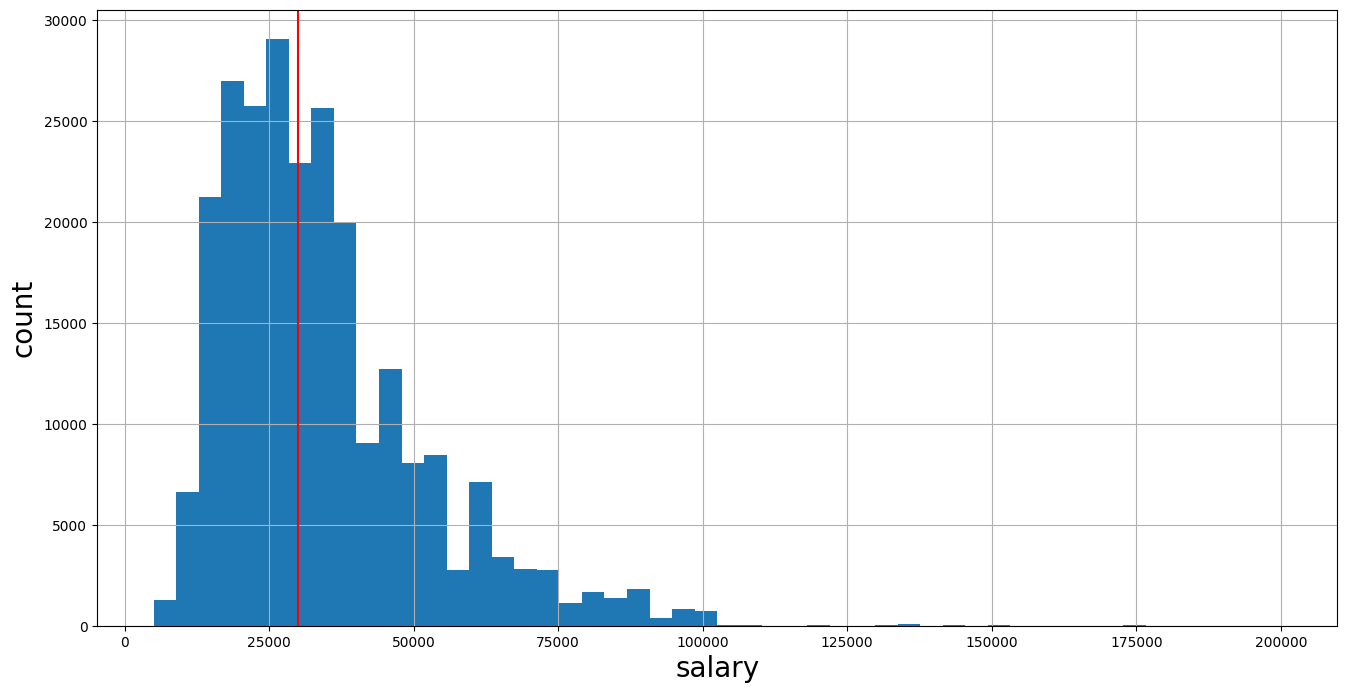

In [42]:
# salary histogramm
median = np.median(df['SalaryNormalized'])

figsize(16,8)
plt.hist(df['SalaryNormalized'], bins=50)
plt.axvline(median, c='r')
plt.xlabel('salary', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.grid()

Осуществим последние шаги по подготовке датасета:
- бинаризуем признак SalaryNomalized по описанному ранее порогу;
- исключим из выборки признак SalaryRaw, чтобы устранить утечку целевой переменной в признаки.

In [43]:
df['SalaryNormalized'] = (df['SalaryNormalized'] > median).astype(int)
df.drop('SalaryRaw', axis=1, inplace=True)
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,0,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,0,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,0,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,0,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,0,cv-library.co.uk


#### 1. (0 баллов) Разбейте получившуюся выборку на обучающую и контрольную в соотношении 70/30 с использованием перемешивания объектов.

При разбиении используйте значение параметра random_state=42.

In [44]:
df = df.reindex(np.random.permutation(df.index))

In [45]:
y = df["SalaryNormalized"]
# y.head()

In [46]:
df.drop("SalaryNormalized", axis=1, inplace=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(df, y, test_size=0.3, random_state=42)

In [47]:
# print X_train.shape, y_test.shape
y_train = y_train.reset_index()
y_test = y_test.reset_index()

## Векторизация

Как правило, модели, используемые в машинном обучении, применяются в предположении, что матрица "объект-признак" является вещественнозначной. Поэтому при работе с категориальными признаками и текстами сперва их необходимо привести к вещественному виду.

Заметим, что в нашей задаче есть признаки, являющиеся текстами произвольной природы (Title, FullDescription), и категориальные признаки, принимающие ограниченное число значений (ContractType, Category и др.).

Самый простой и понятный способ преобразования текстовых данных — векторизация. В этом случае для каждого слова, встречающегося в некотором набре текстов мы создаём отдельный новый признак, который будет равен $1$, когда слово встречается в заданном объекте, и $0$ – в противном случае.

#### 2. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения всех признаков каждого объекта выборки через символы пробела. После этого получите признаковое описание объектов, осуществив векторизацию получившихся текстов при помощи [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), обучив его на обучающей выборке и применив на контрольной.

In [48]:
X_train = X_train.replace(np.nan, ' ', regex=True)
X_test = X_test.replace(np.nan, ' ', regex=True)

X_train["Desc"] = X_train["Title"] + " " + X_train["FullDescription"] + " " + X_train["LocationRaw"] + " " + X_train["LocationNormalized"] + " " + X_train["ContractType"] + " " + X_train["ContractTime"] + " " + X_train["Company"] + " " + X_train["Category"]
X_test["Desc"] = X_test["Title"] + " " + X_test["FullDescription"] + " " + X_test["LocationRaw"] + " " + X_test["LocationNormalized"] + " " + X_test["ContractType"] + " " + X_test["ContractTime"] + " " + X_test["Company"] + " " + X_test["Category"]

In [49]:
%%time
vectorizer = feature_extraction.text.CountVectorizer(binary=True)
X_train_bag = vectorizer.fit_transform(X_train["Desc"])


CPU times: user 38.6 s, sys: 532 ms, total: 39.1 s
Wall time: 41.5 s


In [50]:
X_train_bag

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 25241717 stored elements and shape (171337, 168755)>

In [51]:
%%time
X_test_bag = vectorizer.transform(X_test["Desc"])
# X_test_bag
# df[7:10]

CPU times: user 17 s, sys: 45 ms, total: 17.1 s
Wall time: 17.2 s


#### 3. (1.5 балла) Обучите следующие модели на обучающей выборке:
 - [логистическую регрессию](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из модуля sklearn с параметрами по умолчанию;
 - логистическую регрессию при помощи Vowpal Wabbit с параметрами по умолчанию.

In [52]:
%%time
lr = linear_model.LogisticRegression(n_jobs=16)
lr = lr.fit(X_train_bag, y_train["SalaryNormalized"])

CPU times: user 1.58 s, sys: 2.12 s, total: 3.71 s
Wall time: 30.2 s


In [53]:
prob_pred_lr = lr.predict_proba(X_test_bag)
class_pred_lr = lr.predict(X_test_bag)

In [54]:
def build_vw_data(filename, X_vect, y):
    f = open(filename, "w")
    for i in range(X_vect.shape[0]):
        vw_raw = str(1 if y.loc[i]["SalaryNormalized"] else -1) + " |features"
        for feature in range(X_vect.indptr[i], X_vect.indptr[i+1]):
            vw_raw += " " + str(X_vect.indices[feature]) + ":" + str(float(X_vect.data[feature]))
        vw_raw += "\n"
        f.write(vw_raw)
    f.close()

In [55]:
%%time
build_vw_data("train.vw", X_train_bag, y_train)
build_vw_data("test.vw", X_test_bag, y_test)


CPU times: user 49.2 s, sys: 1.21 s, total: 50.4 s
Wall time: 50.9 s


In [56]:
%%time
!vw -d train.vw --loss_function=logistic --readable_model solution.txt -f solution.vw

final_regressor = solution.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = train.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000      178
0.560864 0.428581            2            2.0  -1.0000  -0.6253      188
0.732836 0.904807            4            4.0  -1.0000  -0.1999       71
0.498703 0.264571            8            8.0  -1.0000  -1.5009      130
0.678478 0.858252           16           16.0   1.0000  -0.5613      149
0.674039 0.669601           32           32.0  -1.0000  -1.0182      100
0.661873 0.649706           64           64.0  -1.0000  -0.5970      154
0.650891 0.639909          128          128.0  -1.0000  -0.6825      209
0.614522 0.578153          256          256.0  -1.0000   1.1357      129
0.599961 0.585400          512         

In [57]:
!vw -d test.vw -t -i solution.vw --link=logistic -p probs.vw

only testing
predictions = probs.vw
Error: option '--link' cannot be specified more than once

finished run
number of examples = 0
weighted example sum = 0.000000
weighted label sum = 0.000000
average loss = n.a.
total feature number = 0
option '--link' cannot be specified more than once
vw: option '--link' cannot be specified more than once


In [58]:
!vw -d test.vw -t -i solution.vw --binary -p pred.vw

only testing
predictions = pred.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = test.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.000000 0.000000            1            1.0   1.0000   1.0000      210
0.000000 0.000000            2            2.0  -1.0000  -1.0000      114
0.000000 0.000000            4            4.0  -1.0000  -1.0000      164
0.000000 0.000000            8            8.0  -1.0000  -1.0000      208
0.062500 0.125000           16           16.0   1.0000   1.0000      136
0.062500 0.062500           32           32.0  -1.0000  -1.0000      160
0.093750 0.125000           64           64.0   1.0000   1.0000      176
0.117188 0.140625          128          128.0  -1.0000  -1.0000      106
0.136719 0.156250          256          256.0   1.0000   1.0000      269
0.128906 0.121094          512     

#### 4. (0.5 балла) Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для каждой из построенных в п. 3 моделей на контрольной выборке. Сравните построенные модели по качеству их работы.

In [59]:
#sklearn
print("AUC-ROC:", metrics.roc_auc_score(y_test["SalaryNormalized"], prob_pred_lr[:,1]))
print("F-measure:", metrics.f1_score(y_test["SalaryNormalized"], class_pred_lr))
print(metrics.confusion_matrix(y_test["SalaryNormalized"], class_pred_lr))

AUC-ROC: 0.9364188492131128
F-measure: 0.8601489836286351
[[32805  5151]
 [ 4818 30657]]


In [66]:
#vw
prob_pred_vw = pd.read_csv("probs.vw", names=["PROB"], header=None)
class_pred_vw = pd.read_csv("pred.vw", header=None, names=["PRED"])
class_pred_vw.ix[class_pred_vw.PRED == -1, "PRED"] = 0
print("AUC-ROC:", metrics.roc_auc_score(y_test["SalaryNormalized"], prob_pred_vw))
print("F-measure:", metrics.f1_score(y_test["SalaryNormalized"], class_pred_vw))
print(metrics.confusion_matrix(y_test["SalaryNormalized"], class_pred_vw))

NameError: name 'predictions_vw' is not defined

Оба результата очень хорошие. Метрика AUC-ROC оценивает приятнее F-меры, так что если уж показывать боссу результат, то использовать её. По всем показателям логистическая регрессия лучше обучилась у sklearn. В том числе и ошибок FP FN меньше дал на тестовой выборке sklearn. Вообще vw тоже норм, учитывая скорость обучения, результаты получились отличные.

#### 5. (1 балл) Отсортируйте веса признаков для модели логистической регрессии из scikit-learn, полученной в п. 2. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретируйте полученный результат.

In [67]:
def get_sorted_words(coefs, word_names):
    pos_weights = []
    neg_weights = []
    for i in range(coefs.shape[1]):
        pos_weights.append([i, coefs[0][i]]) if coefs[0][i] > 0 else neg_weights.append([i, coefs[0][i]])

    pos_weights = sorted(pos_weights, key=lambda x: x[1]) #по возрастанию веса
    neg_weights = sorted(neg_weights, key=lambda x: -x[1]) #по убыванию веса


    print("САМЫЕ весомые вверх:\n")
    for i in range(20):
        print(word_names[pos_weights[- i - 1][0]])

    print("САМЫЕ весомые вниз:\n")
    for i in range(20):
        print(word_names[neg_weights[- i - 1][0]])

    print("САМЫЕ не весомые вверх и вниз:\n")
    for i in range(10):
        print(word_names[pos_weights[i][0]], ">up")
        print(word_names[neg_weights[i][0]], "<down")

In [68]:
get_sorted_words(lr.coef_, vectorizer.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

Результаты получились логичные. Зарплату значительно повышают разные начальники, менеджеры, судьи, hcpс(Health and Care Professions Council), вообщем специалисты. Понижают слова вроде бистро, помошник, стажер, сторож, клерк и прочие. Незначительное влияние имеют "битые" слова и общеупотребимые, обычно не несущие никакой конкретики, а так же прилагательные(они обычно употребляются во всех объявлениях независимо от зарплаты).

#### 6. (0.5 доп. балла) Отсортируйте веса признаков для модели логистической регрессии, полученной в п. 2 при помощи Vowpal Wabbit. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретирйте полученный результат.

In [ ]:
sol = pd.read_csv("solution.txt", sep=":", skiprows=11, header=None, names=["id", "w"])

In [ ]:
get_sorted_words(np.array([sol["w"]]), vectorizer.get_feature_names())

Тут поменьше мусора, но результат вцелом очень похож на предыдущий.
manager
lawyer
solicitor
director
senior pomidor
gmc
lecturer
тут и директор и мееджер и дженерал моторс, все эти слова имеют высокое влияние на классификацию 1.
Разная прислуга, асистенты вроде assistant, планктон (clerk commis), выпускники получают, занятые частично (unloading, partie) имеют маленькую зарплату.
Редкие слова имеют вес около нуля.
Интерестно, в каком контексте употреблялось слово пиво? Погляжу на досуге...

## TF-IDF

Ещё один способ работы с текстовыми данными — [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf) (**T**erm **F**requency–**I**nverse **D**ocument **F**requency). Рассмотрим коллекцию текстов $D$.  Для каждого уникального слова $t$ из документа $d \in D$ вычислим следующие величины:

1. Term Frequency – количество вхождений слова в отношении к общему числу слов в тексте:
$$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$
где $n_{td}$ — количество вхождений слова $t$ в текст $d$.
1. Inverse Document Frequency
$$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$
где $\left| \{d\in D: t \in d\} \right|$ – количество текстов в коллекции, содержащих слово $t$.

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину:
$$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

Отметим, что значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D).$

Признаковым описанием одного объекта $d \in D$ будет вектор $\bigg(\text{tf-idf}(t,d, D)\bigg)_{t\in V}$, где $V$ – словарь всех слов, встречающихся в коллекции $D$.

#### 7. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения всех признаков каждого объекта выборки через символы пробела. После этого получите признаковое описание объектов, вычислив вектор tf-idf для каждого объекта помощи [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), обучив его на обучающей выборке и применив на контрольной.

In [ ]:
%%time
tfidf_vectorizer = feature_extraction.text.TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train["Desc"])
X_test_tfidf = tfidf_vectorizer.transform(X_test["Desc"])

#### 8. (0 баллов) Обучите следующие модели на обучающей выборке:
- [логистическую регрессию](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из модуля sklearn с параметрами по умолчанию;
- логистическую регрессию при помощи Vowpal Wabbit с параметрами по умолчанию.

In [ ]:
%%time
lr_tfidf = linear_model.LogisticRegression(n_jobs=16)
lr_tfidf = lr_tfidf.fit(X_train_tfidf, y_train["SalaryNormalized"])

prob_pred_lr_tfidf = lr_tfidf.predict_proba(X_test_tfidf)
class_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)

In [ ]:
%%time
build_vw_data("train_tfidf.vw", X_train_tfidf, y_train)
build_vw_data("test_tfidf.vw", X_test_tfidf, y_test)

In [ ]:
%%time
!vw -d train_tfidf.vw --loss_function=logistic --readable_model solution_tfidf.txt -f solution_tfidf.vw

In [ ]:
!vw -d test_tfidf.vw -t -i solution_tfidf.vw --link=logistic -p probs_tfidf.vw

In [ ]:
!vw -d test_tfidf.vw -t -i solution_tfidf.vw --binary -p pred_tfidf.vw

#### 9. (0.5 балла) Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для каждой из построенных в п. 8 моделей на контрольной выборке. Сравните построенные модели по качеству их работы.

In [ ]:
#sklearn
print("AUC-ROC:", metrics.roc_auc_score(y_test["SalaryNormalized"], prob_pred_lr_tfidf[:,1]))
print("F-measure:", metrics.f1_score(y_test["SalaryNormalized"], class_pred_lr_tfidf))
print(metrics.confusion_matrix(y_test["SalaryNormalized"], class_pred_lr_tfidf))

In [ ]:
#vw
prob_pred_vw_tfidf = pd.read_csv("probs_tfidf.vw", names=["PROB"], header=None)
class_pred_vw_tfidf = pd.read_csv("pred_tfidf.vw", header=None, names=["PRED"])
class_pred_vw_tfidf.ix[class_pred_vw_tfidf.PRED == -1, "PRED"] = 0
print("AUC-ROC:", metrics.roc_auc_score(y_test["SalaryNormalized"], prob_pred_vw_tfidf))
print("F-measure:", metrics.f1_score(y_test["SalaryNormalized"], class_pred_vw_tfidf))
print(metrics.confusion_matrix(y_test["SalaryNormalized"], class_pred_vw_tfidf))

vw модель показала лучший результат по всем метрикам. И площадь и гармоническое среднее pres и rec незначительно выше у модели vw. Ошибок FP FN так же меньше у vw.

#### 10. (0.5 балла) Сравните значения метрик из п. 9 со значениями, полученными в п. 5, и сравните соответствующие модели по качеству из работы.

**Ответ**:

В случае sklearn бинарная векторизация сработала чуть лучше чем tf-idf кодирование по всем метрикам.
В случае vw ситуация обратная: показатели по всем метрикам при tf-idf кодировании здесь лучше.
Разница вцелом соизмерима для всех случаев - auc-roc и f-мера отличаются на ~10-15 тысячных. Количество ошибок плавает от 200 до 600, что вцелом незначительно, учитывая количество правильных ответов и размер выборки вцелом.
Таким образом, для бинарной векторизации лучше работает модель sklearn, vw же пригодится при tf-idf кодировании признаков.

#### 11. (1 балл) Отсортируйте веса признаков для модели sclearn. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретирйте полученный результат.

In [ ]:
get_sorted_words(lr_tfidf.coef_, tfidf_vectorizer.get_feature_names())

Все из по той же схеме: лондон(дороговато там), синьер, главный, директор - имеют большой вес при определении положительного класса.
Помошник, джуниор, стажировка, телефон, выпускник - увеличивают расстояние от положительного класса.
Всякий мусор и слова, которые редко встречаются, имеют незначительное влияние, как и в прошлый раз.

#### 12. (0.5 доп. балла) Отсортируйте веса признаков для модели логистической регрессии, полученной в п. 8 при помощи Vowpal Wabbit. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретирйте полученный результат.

In [ ]:
sol_tf_idf = pd.read_csv("solution_tfidf.txt", sep=":", skiprows=11, header=None, names=["id", "w"])
get_sorted_words(np.array([sol_tf_idf["w"]]), tfidf_vectorizer.get_feature_names())

Снова видим суперлегальных менеджеров и, правда, много новых слов, которые редко встречаются, однако, их объявления  имеют высокую вероятность большой зарплаты.
Сильно понижают вероятность слова assistant и 45(видно слишком старый)
Слабое влияние имеют слова общеупотребляемые, бесполезные для классификации.
Вообще это самый <strike>неадекватный</strike> интересный вывод этого задания из всех четырех, возможно что-то съехало, пора сдаваться.



## Счётчики

Ранее в рамках данного задания при построении моделей мы объединяли значения всех признаков в единую строку, что предполагает равноправность всех признаков. Однако заметим, что в этом случае мы допускаем потерю информации: слово "Glasgow" может по-разному влиять на зарплату, если оно находится в названии объявления и в геолокации. Чтобы устранить этот недостаток, при создании текстового описания объекта будем объединять только значения признаков Title и FullDescription, а остальные будем рассматривать как категориальные. При этом с полученным текстовым описанием объекта будем работать, как раньше (при помощи векторизации или tf-idf), а для кодирования категориальных признаков используем **счётчики**.

Идея этого метода состоит в том, чтобы заменить значение категориального признака на вероятность того, что объект с данным значением признака относится к положительному классу. Опишем эту идею более формально. Пусть у нас есть выборка $X = \{ (x_i, y_i) \}_{i=1}^l,$ и $j$-ый признак принимает значения из множества $U_j = \{ u_{jn}\}_{n=1}^{N_j},$ где $N_j$ — количество различных значений $j$-ого признака. Пусть $x_{ij} = u_{jn},$ тогда заменим значения $j$-ого категориального признака объекта $x_i$ на следующую оценку:
$$\hat{P}(y_i=+1|x_{ij}=u_{jn}) = \frac{\sum_{m=1}^l \left[ x_{mj} = u_{jn} \right] \left[ y_m = +1 \right]}{\sum_{m=1}^l \left[ x_{mj} = u_{jn} \right]}.$$

Однако заметим, что при таком способе формирования счётчиков мы учитываем в формуле для объекта $x_i$ его метку $y_i$, тем самым вносим информацию об ответе в признаки. Чтобы устранить этот недостаток, при вычислении счётчика будем исключать из рассмотрения текущий объект, т.е. рассматривать следующую оценку:
$$\hat{P}(y_i=+1|X_{ij}=u_{jn}) = \frac{\sum_{m=1, \\ m \ne i}^l \left[ x_{mj} = u_{jn} \right] \left[ y_m = +1 \right]}{\sum_{m=1, \\ m \ne i}^l \left[ x_{mj} = u_{jn} \right]},$$

#### 13. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения признаков Title и FullDescription каждого объекта выборки через символ пробела, после чего перейдите к признаковому описанию объектов, вычислив вектор tf-idf аналогично п. 7.

In [ ]:
X_train = X_train.fillna('nan')
X_test = X_test.fillna('nan')
df = df.fillna('nan')

In [ ]:
%%time
X_train["Desc"] = X_train["Title"] + " " + X_train["FullDescription"]
X_test["Desc"] = X_test["Title"] + " " + X_test["FullDescription"]
num_tfidf_vectorizer = feature_extraction.text.TfidfVectorizer()
X_train_num_tfidf = num_tfidf_vectorizer.fit_transform(X_train["Desc"])
X_test_num_tfidf = num_tfidf_vectorizer.transform(X_test["Desc"])

#### 14. (1 балл) Закодируйте категориальные признаки (все, кроме Title и FullDescription) при помощи [one-hot encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), после чего обучите логистическую регрессию (при помощи scikit-learn или Vowpal Wabbit) на обучающей выборке. Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для полученной модели на контрольной выборке.

In [ ]:
df["Desc"] = 0

In [ ]:
X_test.head(1)

In [ ]:
X_test.shape

In [ ]:
df.shape

In [ ]:
%%time
data_features_mask = [False, False, False, True, True, True, True, True, True, True, False]
# X_train = X_train.fillna('nan')
# X_test = X_test.fillna('nan')
# df = df.fillna('nan')
label_enc = preprocessing.LabelEncoder()
for feature in df.columns[data_features_mask]:
    df[feature] = label_enc.fit_transform(df[feature])
    X_train[feature] = label_enc.transform(X_train[feature])
    X_test[feature] = label_enc.transform(X_test[feature])

In [ ]:
OneHot = preprocessing.OneHotEncoder()
OneHot.fit(df[df.columns[data_features_mask]])
X_train_onehot_s_mtx = OneHot.transform(X_train[X_train.columns[data_features_mask]])
X_test_onehot_s_mtx = OneHot.transform(X_test[X_test.columns[data_features_mask]])

In [ ]:
%%time


lr_tfidf_mixed_onehot = linear_model.LogisticRegression(n_jobs=16)
lr_tfidf_mixed_onehot.fit(hstack((X_train_num_tfidf, X_train_onehot_s_mtx)), y_train["SalaryNormalized"])

prob_pred_lr_tfidf_mixed_onehot = lr_tfidf_mixed_onehot.predict_proba(hstack((X_test_num_tfidf, X_test_onehot_s_mtx)))
class_pred_lr_tfidf_mixed_onehot = lr_tfidf_mixed_onehot.predict(hstack((X_test_num_tfidf, X_test_onehot_s_mtx)))

In [ ]:
#sklearn
print("AUC-ROC:", metrics.roc_auc_score(y_test["SalaryNormalized"], prob_pred_lr_tfidf_mixed_onehot[:,1]))
print("F-measure:", metrics.f1_score(y_test["SalaryNormalized"], class_pred_lr_tfidf_mixed_onehot))
print(metrics.confusion_matrix(y_test["SalaryNormalized"], class_pred_lr_tfidf_mixed_onehot))

#### 15. (2 балла) Для выборки, полученной в п. 13, закодируйте категориальные признаки (все, кроме Title и FullDescription) при помощи счётчиков, после чего обучите логистическую регрессию (при помощи scikit-learn или Vowpal Wabbit) на обучающей выборке. Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для полученной модели на контрольной выборке.

Уделите внимание оптимальности вычисления счётчиков!

In [ ]:
X_train = X_train.reset_index()

In [ ]:
X_test = X_test.reset_index()

In [ ]:
X_train.head(1)

In [ ]:
X_train["target"] = y_train["SalaryNormalized"]

In [ ]:
X_test["target"] = y_test["SalaryNormalized"]

In [ ]:
def set_feature_probs(feature, X, feature_count):
    adt_mtx = np.array([[(X[X[feature] == i].shape[0] - 1), (X[(X[feature] == i) & (X["target"])].shape[0]), 0] for i in range(feature_count + 1)], dtype=float) # i|количество прин i - 1|колич +1
    for i in adt_mtx:
        if i[0] == 0:
            i[2] = 0
            i[0] = 9999999999999990
        else:
            i[2] = (i[1] / i[0])
    X[feature] = X.apply(lambda x: adt_mtx[x[feature]][2] - ((1 / adt_mtx[x[feature]][0]) if x["target"] else 0), axis = 1)
    return X[feature]

In [ ]:
features_s = ["LocationRaw", "LocationNormalized", "ContractType", "ContractTime", "Company", "Category", "SourceName"]

In [ ]:
%%time
for feature in features_s:
    X_train[feature] = set_feature_probs(feature, X_train, df[feature].max())

In [ ]:
%%time
for feature in features_s:
    X_test[feature] = set_feature_probs(feature, X_test, df[feature].max())

In [ ]:
X_test.head(1)

In [ ]:
X_train_num_num_s_mtx = X_train[features_s].to_sparse()

In [ ]:
X_test_num_num_s_mtx = X_test[features_s].to_sparse()

In [ ]:
X_train_num_num_s_mtx = csr.csr_matrix(X_train_num_num_s_mtx)

In [ ]:
X_test_num_num_s_mtx = csr.csr_matrix(X_test_num_num_s_mtx)

In [ ]:
%%time
lr_tfidf_mixed_num = linear_model.LogisticRegression(n_jobs=16)
lr_tfidf_mixed_num.fit(hstack((X_train_num_tfidf, X_train_num_num_s_mtx)), y_train["SalaryNormalized"])

prob_pred_lr_tfidf_mixed_num = lr_tfidf_mixed_num.predict_proba(hstack((X_test_num_tfidf, X_test_num_num_s_mtx)))
class_pred_lr_tfidf_mixed_num = lr_tfidf_mixed_num.predict(hstack((X_test_num_tfidf, X_test_num_num_s_mtx)))

In [ ]:
#sklearn
print("AUC-ROC:", metrics.roc_auc_score(y_test["SalaryNormalized"], prob_pred_lr_tfidf_mixed_num[:,1]))
print("F-measure:", metrics.f1_score(y_test["SalaryNormalized"], class_pred_lr_tfidf_mixed_num))
print(metrics.confusion_matrix(y_test["SalaryNormalized"], class_pred_lr_tfidf_mixed_num))

#### 16. (0.5 балла) Сравните значения метрик из п. 15 со значениями, полученными в п. 14, и сделайте вывод о качестве классификации для каждого из методов кодирования категориальных признаков.

**Ответ:**

Кодирование с onehot показало лучшее качество по всем метрикам в сравнении с моей реалиацией счетчиков. Отличие AUC-ROC и f-мера ниже на 1-2 сотых, что может быть связано не только с самим методом, но и с тем что кодирование производилось согласно всей выборке. В то время как мои счетчики устанавливались независимо для обучения и теста. Так можно сделать благодаря размерам и высокой сбалансированности выборок, не без потерь, конечно.
При использовании счетчиков, классификатор стал много ошибаться определяя положительные объекты как отрицательные.
На основе полученных результатов можно сделать вывод о том, что tf-idf + onehot кодирование работает для нашей задачи классификации лучше чем tf-idf + счетчики.

## Подбор гиперпараметров

#### 17. (1.5 доп. балла) Разбейте обучающую выборку на обучающую и валидационную в отношении 80/20. Для выборки, полученной в п. 13, подберите оптимальное количество фолдов, используемое при кодировании категориальных признаков (всех, кроме Title и FullDescription), путём оптимизации значения accuracy на валидационной выборке. Используйте следующие модели, аналогично также подобрав оптимальные значения указанных гиперпараметров:
- логистическую регрессию из модуля sklearn с подбором коэффициента регуляризации;
- логистическую регрессию при помощи Vowpal Wabbit с подбором следующих гиперпараметров:
    - коэффициент регуляризации (--l2);
    - количество эпох (--passes);
    - длина градиентного шага (-l);
    - длина N-грамм (--ngram).

In [ ]:
# Your code here

#### 18. (0.5 доп. балла) Обучите указанные выше модели на обучающей выборке для оптимальных значений гиперпараметров, найденных в п. 17, после чего для каждой из моделей вычислите значения ROC-AUC, F-меры, а также постройте матрицу ошибок на контрольной выборке. Как качество классификации при помощи полученных в данном разделе моделей соотносится с моделями, полученными в предыдущих разделах?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу вторую любимую картинку.